# Updating and Expanding on Group Assignment #1 

##### Contributor: Emily Cadena

## Who’s Most at Risk? Social Demographics and Traffic Collisions in the City of Los Angeles

### Our research will evaluate different socio-demographic characteristics, such as median household income, race and ethnicity, and age to explore which communities are most susceptible to traffic collisions in the City of Los Angeles. This notebook will explore race and ethnicity in the City of LA. Unlike the previous assignment, I focused on LA County. 

## Data Sources & Geographic Information

American Community Survey (ACS) 2015-2019 (5-Year Estimates) - Hispanic or Latino by Race  
2019 Census Tracts from IPUMS NHGIS

### Importing libraries

In [1]:
# importing pandas for data exploration 
import pandas as pd
import geopandas as gpd

# importing for plots and tables 
import matplotlib.pyplot as plt
import contextily as ctx

#importing for interactive plots 
import plotly.express as px

In [2]:
# upload acs 2015-2019
race = pd.read_csv('data4/race15_19.csv')

In [3]:
# rows and columns 
race.shape

(2346, 39)

In [4]:
# too many columns to populate, so we elaborate on info
race.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   int64  
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2346 non-null   int64  
 14  Geo_COUNTY         2346 non-null   int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non

In [5]:
race.head(5)

Geo_FIPS           Geo_GEOID              Geo_NAME  \
0  6037101110  14000US06037101110  Census Tract 1011.10   
1  6037101122  14000US06037101122  Census Tract 1011.22   
2  6037101210  14000US06037101210  Census Tract 1012.10   
3  6037101220  14000US06037101220  Census Tract 1012.20   
4  6037101300  14000US06037101300     Census Tract 1013   

                                           Geo_QName Geo_STUSAB  Geo_SUMLEV  \
0  Census Tract 1011.10, Los Angeles County, Cali...         ca         140   
1  Census Tract 1011.22, Los Angeles County, Cali...         ca         140   
2  Census Tract 1012.10, Los Angeles County, Cali...         ca         140   
3  Census Tract 1012.20, Los Angeles County, Cali...         ca         140   
4  Census Tract 1013, Los Angeles County, California         ca         140   

   Geo_GEOCOMP Geo_FILEID  Geo_LOGRECNO  Geo_US  ...  SE_B04001_010  \
0            0      ACSSF          3871     NaN  ...           1188   
1            0      ACSSF          3872     NaN  ...            147   
2            0      ACSSF          3873     NaN  ...           2616   
3            0      ACSSF          3874     NaN  ...           1364   
4            0      ACSSF          3875     NaN  ...            297   

   PCT_SE_B04001_002  PCT_SE_B04001_003  PCT_SE_B04001_004  PCT_SE_B04001_005  \
0              72.26              61.08               0.44               0.07   
1              95.68              84.64               2.17               0.44   
2              58.78              47.05               3.12               0.00   
3              63.16              48.95               2.35               0.00   
4              92.35              80.48               5.28               0.00   

   PCT_SE_B04001_006  PCT_SE_B04001_007  PCT_SE_B04001_008  PCT_SE_B04001_009  \
0               7.73               0.07               0.19               2.69   
1               6.46               0.00               0.00               1.97   
2               7.66               0.00               0.74               0.22   
3               9.21               0.00               0.00               2.65   
4               4.99               0.00               0.00               1.60   

   PCT_SE_B04001_010  
0              27.74  
1               4.32  
2              41.22  
3              36.84  
4               7.65  

[5 rows x 39 columns]

### Converting Data Types

In [6]:
# going into the Geo_FIPS column
# leading zero is missing 
race.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101210
3    6037101220
4    6037101300
Name: Geo_FIPS, dtype: int64

In [7]:
# converting FIPS, state, and county data type from integer to string to include leading zero 
race = pd.read_csv('data4/race15_19.csv',
     dtype=
                 {'Geo_FIPS': str, 
                  'Geo_STATE': str, 
                  'Geo_COUNTY': str })

In [8]:
race.head(5)

Geo_FIPS           Geo_GEOID              Geo_NAME  \
0  06037101110  14000US06037101110  Census Tract 1011.10   
1  06037101122  14000US06037101122  Census Tract 1011.22   
2  06037101210  14000US06037101210  Census Tract 1012.10   
3  06037101220  14000US06037101220  Census Tract 1012.20   
4  06037101300  14000US06037101300     Census Tract 1013   

                                           Geo_QName Geo_STUSAB  Geo_SUMLEV  \
0  Census Tract 1011.10, Los Angeles County, Cali...         ca         140   
1  Census Tract 1011.22, Los Angeles County, Cali...         ca         140   
2  Census Tract 1012.10, Los Angeles County, Cali...         ca         140   
3  Census Tract 1012.20, Los Angeles County, Cali...         ca         140   
4  Census Tract 1013, Los Angeles County, California         ca         140   

   Geo_GEOCOMP Geo_FILEID  Geo_LOGRECNO  Geo_US  ...  SE_B04001_010  \
0            0      ACSSF          3871     NaN  ...           1188   
1            0      ACSSF          3872     NaN  ...            147   
2            0      ACSSF          3873     NaN  ...           2616   
3            0      ACSSF          3874     NaN  ...           1364   
4            0      ACSSF          3875     NaN  ...            297   

   PCT_SE_B04001_002  PCT_SE_B04001_003 PCT_SE_B04001_004 PCT_SE_B04001_005  \
0              72.26              61.08              0.44              0.07   
1              95.68              84.64              2.17              0.44   
2              58.78              47.05              3.12              0.00   
3              63.16              48.95              2.35              0.00   
4              92.35              80.48              5.28              0.00   

   PCT_SE_B04001_006  PCT_SE_B04001_007  PCT_SE_B04001_008  PCT_SE_B04001_009  \
0               7.73               0.07               0.19               2.69   
1               6.46               0.00               0.00               1.97   
2               7.66               0.00               0.74               0.22   
3               9.21               0.00               0.00               2.65   
4               4.99               0.00               0.00               1.60   

   PCT_SE_B04001_010  
0              27.74  
1               4.32  
2              41.22  
3              36.84  
4               7.65  

[5 rows x 39 columns]

In [9]:
# checking state and county
print(race.Geo_STATE.head(2))     
print(race.Geo_COUNTY.head(2))

0    06
1    06
Name: Geo_STATE, dtype: object
0    037
1    037
Name: Geo_COUNTY, dtype: object


In [10]:
# updated data type for state, county, and census tract 
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   object 
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2346 non-null   object 
 14  Geo_COUNTY         2346 non-null   object 
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non

### Cleaning and Reorganizing the data 

In [11]:
# find unnecessary columns with zero values 
race.columns[race.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_PUMA1']

In [12]:
# deleting uncessary columns 
race = race.dropna(axis=1,how="all")

In [13]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   object 
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_STATE          2346 non-null   object 
 10  Geo_COUNTY         2346 non-null   object 
 11  Geo_TRACT          2346 non-null   int64  
 12  SE_B04001_001      2346 non-null   int64  
 13  SE_B04001_002      2346 non-null   int64  
 14  SE_B04001_003      2346 non-null   int64  
 15  SE_B04001_004      2346 non-null   int64  
 16  SE_B04001_005      2346 

In [14]:
# keep columns
columns_to_keep = ['Geo_FIPS', 
                   'Geo_STATE', 
                   'Geo_COUNTY',
                   'Geo_TRACT',
                   'SE_B04001_001', 
                   'SE_B04001_002', 
                   'SE_B04001_003',      
                   'SE_B04001_004',       
                   'SE_B04001_005',        
                   'SE_B04001_006',       
                   'SE_B04001_007',        
                   'SE_B04001_008',       
                   'SE_B04001_009',      
                   'SE_B04001_010',      
                   'PCT_SE_B04001_002',  
                   'PCT_SE_B04001_003',
                   'PCT_SE_B04001_004',  
                   'PCT_SE_B04001_005',  
                   'PCT_SE_B04001_006',  
                   'PCT_SE_B04001_007',  
                   'PCT_SE_B04001_008',  
                   'PCT_SE_B04001_009',  
                   'PCT_SE_B04001_010']

race=race[columns_to_keep]
                   

In [15]:
# check updated columns 
race.head(2)

Geo_FIPS Geo_STATE Geo_COUNTY  Geo_TRACT  SE_B04001_001  SE_B04001_002  \
0  06037101110        06        037     101110           4283           3095   
1  06037101122        06        037     101122           3405           3258   

   SE_B04001_003  SE_B04001_004  SE_B04001_005  SE_B04001_006  ...  \
0           2616             19              3            331  ...   
1           2882             74             15            220  ...   

   SE_B04001_010  PCT_SE_B04001_002  PCT_SE_B04001_003  PCT_SE_B04001_004  \
0           1188              72.26              61.08               0.44   
1            147              95.68              84.64               2.17   

   PCT_SE_B04001_005  PCT_SE_B04001_006  PCT_SE_B04001_007  PCT_SE_B04001_008  \
0               0.07               7.73               0.07               0.19   
1               0.44               6.46               0.00               0.00   

   PCT_SE_B04001_009  PCT_SE_B04001_010  
0               2.69              27.74  
1               1.97               4.32  

[2 rows x 23 columns]

In [16]:
race.columns.to_list()

['Geo_FIPS',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'SE_B04001_001',
 'SE_B04001_002',
 'SE_B04001_003',
 'SE_B04001_004',
 'SE_B04001_005',
 'SE_B04001_006',
 'SE_B04001_007',
 'SE_B04001_008',
 'SE_B04001_009',
 'SE_B04001_010',
 'PCT_SE_B04001_002',
 'PCT_SE_B04001_003',
 'PCT_SE_B04001_004',
 'PCT_SE_B04001_005',
 'PCT_SE_B04001_006',
 'PCT_SE_B04001_007',
 'PCT_SE_B04001_008',
 'PCT_SE_B04001_009',
 'PCT_SE_B04001_010']

In [17]:
# rename columns
# % is total population XXX (ex. % Total Population: Hispanic or Latino)
race.columns = ['FIPS',
                'State',
                'County',
                'Census Tract',
                'Total Population',
                'Total Population: Not Hispanic or Latino',
                'White Alone',
                'Black or African American Alone',
                'American Indian and Alaska Native Alone',
                'Asian Alone',
                'Native Hawaiian and Other Pacific Islander Alone',
                'Some Other Race Alone',
                'Two or More Races',
                'Hispanic or Latino',
                '% Not Hispanic or Latino',
                '% White Alone',
                '% Black or African American Alone',
                '% American Indian and Alaska Native Alone',
                '% Asian Alone',
                '% Native Hawaiian and Other Pacific Islander Alone',
                '% Some Other Race Alone',
                '% Two or More Races',
                '% Hispanic or Latino']
                    

In [18]:
race.head(2)

FIPS State County  Census Tract  Total Population  \
0  06037101110    06    037        101110              4283   
1  06037101122    06    037        101122              3405   

   Total Population: Not Hispanic or Latino  White Alone  \
0                                      3095         2616   
1                                      3258         2882   

   Black or African American Alone  American Indian and Alaska Native Alone  \
0                               19                                        3   
1                               74                                       15   

   Asian Alone  ...  Hispanic or Latino  % Not Hispanic or Latino  \
0          331  ...                1188                     72.26   
1          220  ...                 147                     95.68   

   % White Alone  % Black or African American Alone  \
0          61.08                               0.44   
1          84.64                               2.17   

   % American Indian and Alaska Native Alone  % Asian Alone  \
0                                       0.07           7.73   
1                                       0.44           6.46   

   % Native Hawaiian and Other Pacific Islander Alone  \
0                                               0.07    
1                                               0.00    

   % Some Other Race Alone  % Two or More Races  % Hispanic or Latino  
0                     0.19                 2.69                 27.74  
1                     0.00                 1.97                  4.32  

[2 rows x 23 columns]

In [19]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 23 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   FIPS                                                2346 non-null   object 
 1   State                                               2346 non-null   object 
 2   County                                              2346 non-null   object 
 3   Census Tract                                        2346 non-null   int64  
 4   Total Population                                    2346 non-null   int64  
 5   Total Population: Not Hispanic or Latino            2346 non-null   int64  
 6   White Alone                                         2346 non-null   int64  
 7   Black or African American Alone                     2346 non-null   int64  
 8   American Indian and Alaska Native Alone             2346 non-null   int64  
 9

# Important! 

### I want data specifically for the City of LA. At the moment, I have data for the entire County of LA. Next step is to merge the City of LA census tracts with LA County census data. Merging allows me to create maps and charts with data ONLY in the City of LA.   


# Merge 

In [20]:
# add city of LA census tract 
cityofla=gpd.read_file('data4/cityLA.zip')

In [21]:
cityofla.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GISJOIN     1168 non-null   object  
 1   STATEFP     1168 non-null   object  
 2   COUNTYFP    1168 non-null   object  
 3   TRACTCE     1168 non-null   object  
 4   GEOID       1168 non-null   object  
 5   NAME        1168 non-null   object  
 6   NAMELSAD    1168 non-null   object  
 7   MTFCC       1168 non-null   object  
 8   FUNCSTAT    1168 non-null   object  
 9   ALAND       1168 non-null   float64 
 10  AWATER      1168 non-null   float64 
 11  INTPTLAT    1168 non-null   object  
 12  INTPTLON    1168 non-null   object  
 13  Shape_Leng  1168 non-null   float64 
 14  Shape_Le_1  1168 non-null   float64 
 15  Shape_Area  1168 non-null   float64 
 16  geometry    1168 non-null   geometry
dtypes: float64(5), geometry(1), object(11)
memory usage: 155.3+ KB


In [22]:
cityofla.head(2)

GISJOIN STATEFP COUNTYFP TRACTCE        GEOID     NAME  \
0  G0600370101110      06      037  101110  06037101110  1011.10   
1  G0600370101122      06      037  101122  06037101122  1011.22   

               NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Census Tract 1011.10  G5020        S  1142401.0     0.0  +34.2594737   
1  Census Tract 1011.22  G5020        S  2644045.0     0.0  +34.2677213   

       INTPTLON   Shape_Leng   Shape_Le_1    Shape_Area  \
0  -118.2929869  4585.520052  4585.520052  1.142400e+06   
1  -118.2901465  9652.233049  9652.233049  2.644046e+06   

                                            geometry  
0  POLYGON ((-2019033.589 -124429.155, -2018948.5...  
1  POLYGON ((-2017297.948 -125225.326, -2017305.0...

<Axes: >

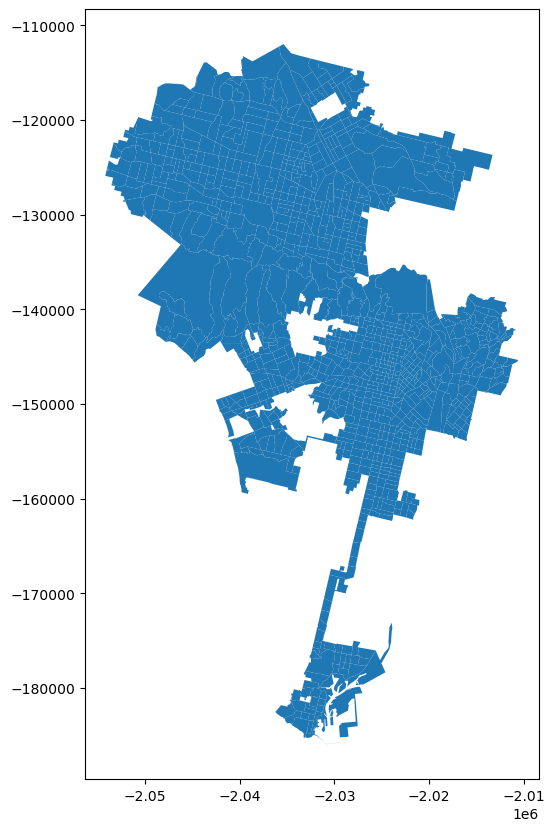

In [23]:
# plot census tracts 
cityofla.plot(figsize=(12,10))

In [24]:
# add a FIPS column
# creating a new column so that I can merge the shapefile and census tracts 
# mistake is probably here (hopefully not) 

cityofla['FIPS'] = '06' + '037' + cityofla['TRACTCE']

In [25]:
# checking new column was made 
cityofla.head(2)

GISJOIN STATEFP COUNTYFP TRACTCE        GEOID     NAME  \
0  G0600370101110      06      037  101110  06037101110  1011.10   
1  G0600370101122      06      037  101122  06037101122  1011.22   

               NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Census Tract 1011.10  G5020        S  1142401.0     0.0  +34.2594737   
1  Census Tract 1011.22  G5020        S  2644045.0     0.0  +34.2677213   

       INTPTLON   Shape_Leng   Shape_Le_1    Shape_Area  \
0  -118.2929869  4585.520052  4585.520052  1.142400e+06   
1  -118.2901465  9652.233049  9652.233049  2.644046e+06   

                                            geometry         FIPS  
0  POLYGON ((-2019033.589 -124429.155, -2018948.5...  06037101110  
1  POLYGON ((-2017297.948 -125225.326, -2017305.0...  06037101122

In [26]:
# need to merge by creating a new dataframe
la_race =cityofla.merge(race,on="FIPS")

In [27]:
# appears that everything merged 
la_race.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   GISJOIN                                             1168 non-null   object  
 1   STATEFP                                             1168 non-null   object  
 2   COUNTYFP                                            1168 non-null   object  
 3   TRACTCE                                             1168 non-null   object  
 4   GEOID                                               1168 non-null   object  
 5   NAME                                                1168 non-null   object  
 6   NAMELSAD                                            1168 non-null   object  
 7   MTFCC                                               1168 non-null   object  
 8   FUNCSTAT                                            1168 non

<Axes: >

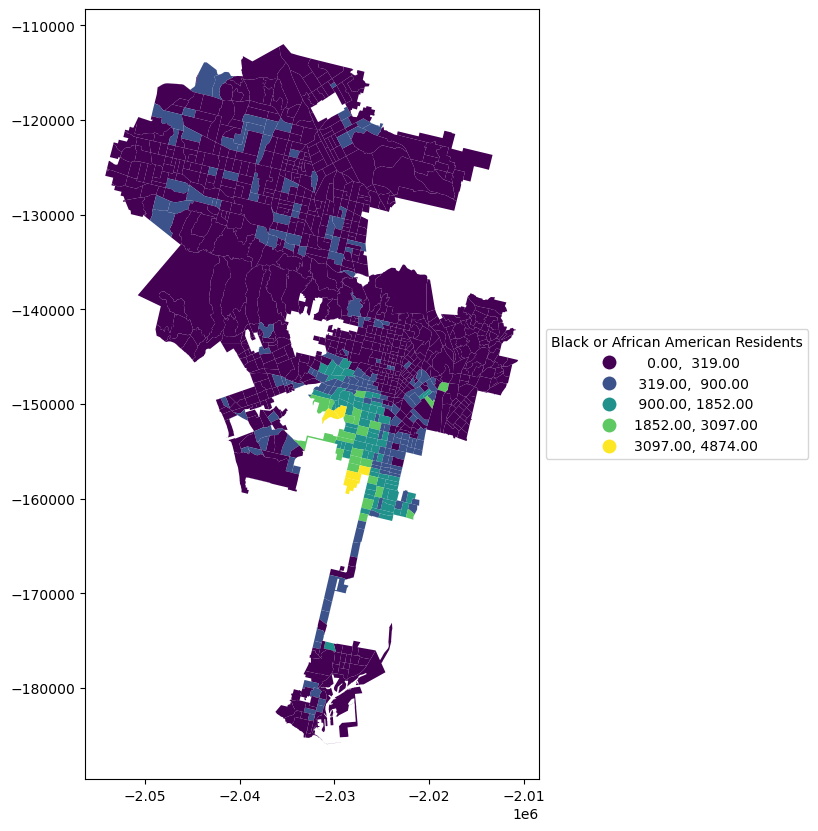

In [28]:
# Black or African American Population in the City of Los Angeles 
la_race.plot(figsize=(12,10),
            column='Black or African American Alone',
            legend=True,
            scheme='NaturalBreaks',
  legend_kwds={'loc': 'center left', 'title': 'Black or African American Residents', 'bbox_to_anchor': (1,0.50)})

<Axes: >

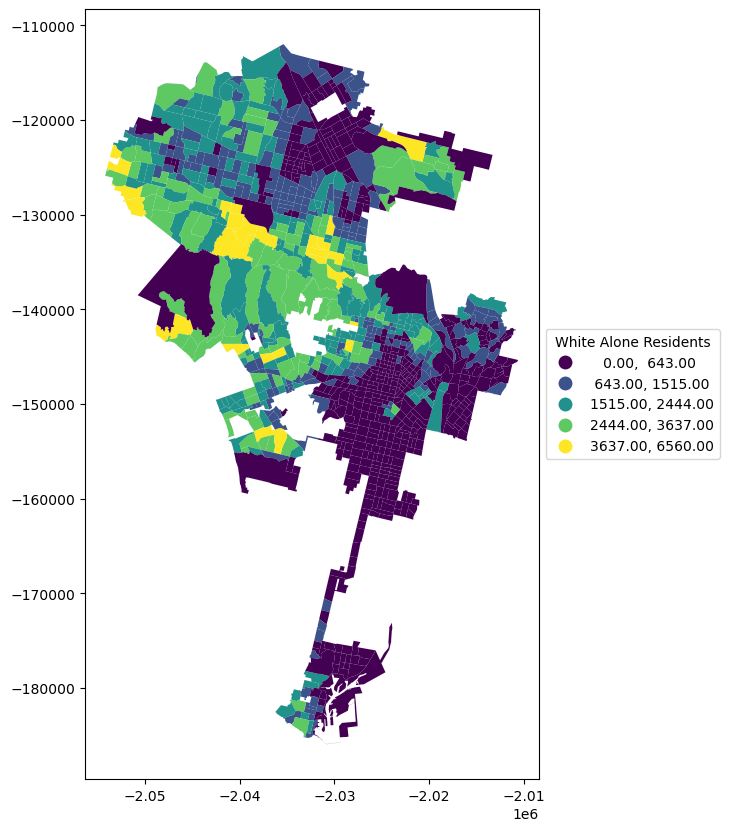

In [29]:
# White Alone in the City of Los Angeles 
la_race.plot(figsize=(12,10),
            column='White Alone',
            legend=True,
            scheme='NaturalBreaks',
  legend_kwds={'loc': 'center left', 'title': 'White Alone Residents', 'bbox_to_anchor': (1,0.50)})

<Axes: >

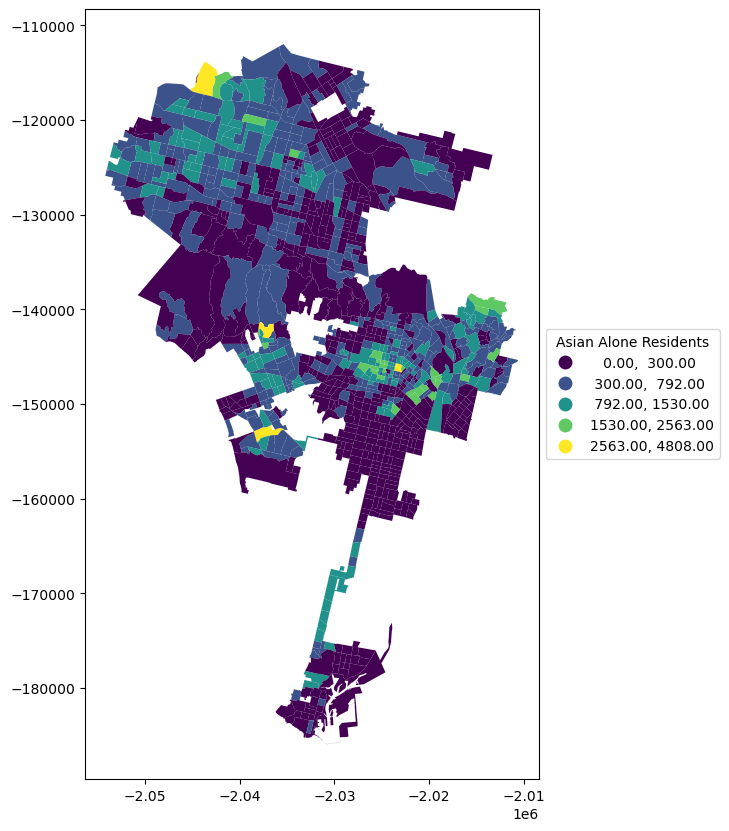

In [30]:
# Asian Alone in the City of Los Angeles 
la_race.plot(figsize=(12,10),
            column='Asian Alone',
            legend=True,
            scheme='NaturalBreaks',
  legend_kwds={'loc': 'center left', 'title': 'Asian Alone Residents', 'bbox_to_anchor': (1,0.50)})

<Axes: >

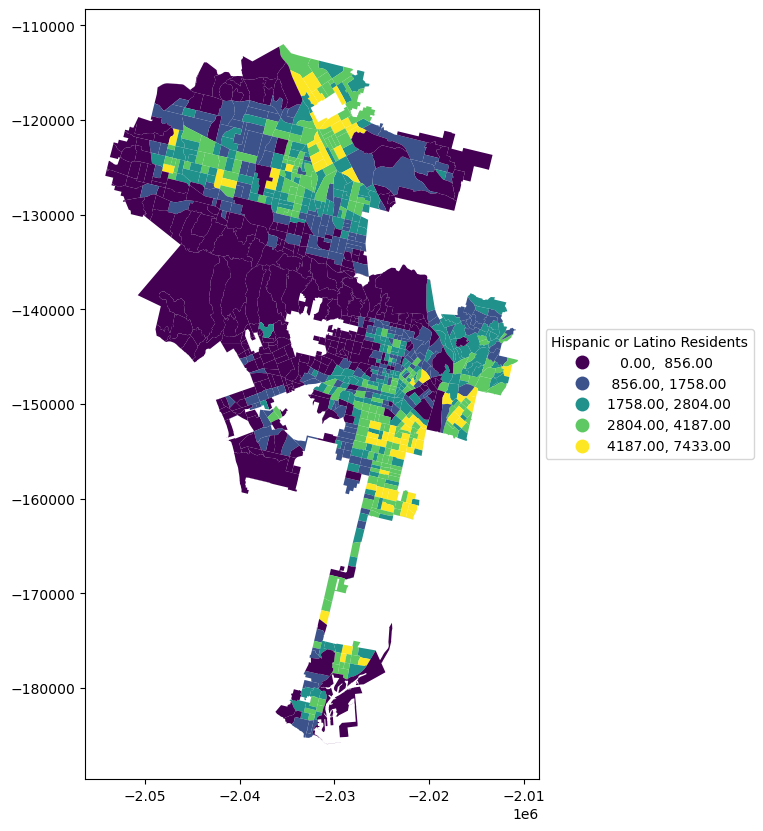

In [31]:
# Hispanic or Latino in the City of Los Angeles 
la_race.plot(figsize=(12,10),
            column='Hispanic or Latino',
            legend=True,
            scheme='NaturalBreaks',
  legend_kwds={'loc': 'center left', 'title': 'Hispanic or Latino Residents', 'bbox_to_anchor': (1,0.50)})

In [32]:
la_race.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   GISJOIN                                             1168 non-null   object  
 1   STATEFP                                             1168 non-null   object  
 2   COUNTYFP                                            1168 non-null   object  
 3   TRACTCE                                             1168 non-null   object  
 4   GEOID                                               1168 non-null   object  
 5   NAME                                                1168 non-null   object  
 6   NAMELSAD                                            1168 non-null   object  
 7   MTFCC                                               1168 non-null   object  
 8   FUNCSTAT                                            1168 non

In [33]:
# find the sum for each race and ethncity 
print(la_race['White Alone'].sum())
print(la_race['Black or African American Alone'].sum())
print(la_race['Asian Alone'].sum())
print(la_race['Hispanic or Latino'].sum())

1378808
430875
543767
2220293


[Text(0, 0, '0'),
 Text(0, 100000, '100000'),
 Text(0, 200000, '200000'),
 Text(0, 300000, '300000'),
 Text(0, 400000, '400000'),
 Text(0, 500000, '500000'),
 Text(0, 600000, '600000'),
 Text(0, 700000, '700000'),
 Text(0, 800000, '800000'),
 Text(0, 900000, '900000'),
 Text(0, 1000000, '1000000'),
 Text(0, 1100000, '1100000'),
 Text(0, 1200000, '1200000'),
 Text(0, 1300000, '1300000'),
 Text(0, 1400000, '1400000'),
 Text(0, 1500000, '1500000'),
 Text(0, 1600000, '1600000'),
 Text(0, 1700000, '1700000'),
 Text(0, 1800000, '1800000'),
 Text(0, 1900000, '1900000'),
 Text(0, 2000000, '2000000'),
 Text(0, 2100000, '2100000'),
 Text(0, 2200000, '2200000'),
 Text(0, 2300000, '2300000')]

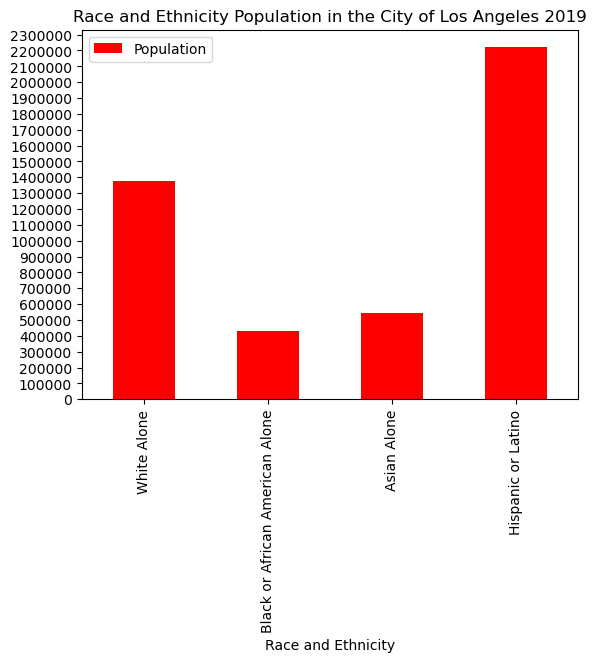

In [34]:
# attempt number 1 - creating a bar chart of race and ethnicty in LA County using pandas
# here i created a new variable 
#racebar1 only includes data for reach race and ethnicity in the City of LA  

racebar1 = racebar1=pd.DataFrame({'Race and Ethnicity':['White Alone', 'Black or African American Alone', 'Asian Alone', 'Hispanic or Latino'], 
                   'Population':[1378808, 430875, 543767, 2220293]})
ax=racebar1.plot.bar(x='Race and Ethnicity', 
               y='Population', 
               title='Race and Ethnicity Population in the City of Los Angeles 2019',
               color='red')

yticks = range(0, max(racebar1['Population']) + 100000, 100000)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{int(tick / 1)}' for tick in yticks])

In [35]:
la_race.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   GISJOIN                                             1168 non-null   object  
 1   STATEFP                                             1168 non-null   object  
 2   COUNTYFP                                            1168 non-null   object  
 3   TRACTCE                                             1168 non-null   object  
 4   GEOID                                               1168 non-null   object  
 5   NAME                                                1168 non-null   object  
 6   NAMELSAD                                            1168 non-null   object  
 7   MTFCC                                               1168 non-null   object  
 8   FUNCSTAT                                            1168 non

In [36]:
racebar1.head(5)

Race and Ethnicity  Population
0                      White Alone     1378808
1  Black or African American Alone      430875
2                      Asian Alone      543767
3               Hispanic or Latino     2220293

In [37]:
# attempt number 2 - creating a bar chart of race and ethnicty in LA County using plotly 
# BAD CHART 
fig = px.bar(racebar1, 
       x='Population',
       title='Race and Ethnicity Population in City of Los Angeles 2019',)
    
      

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()


In [38]:
# attempt number 2 - creating a bar chart of race and ethnicty in LA County using plotly 
# Good Chart  
fig = px.bar(racebar1, 
       x='Race and Ethnicity',
       y='Population',
       title='Race and Ethnicity Population in the City of Los Angeles 2019')
    
# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()


Text(0.5, 1.0, 'White Alone Residents in LA, 2019')

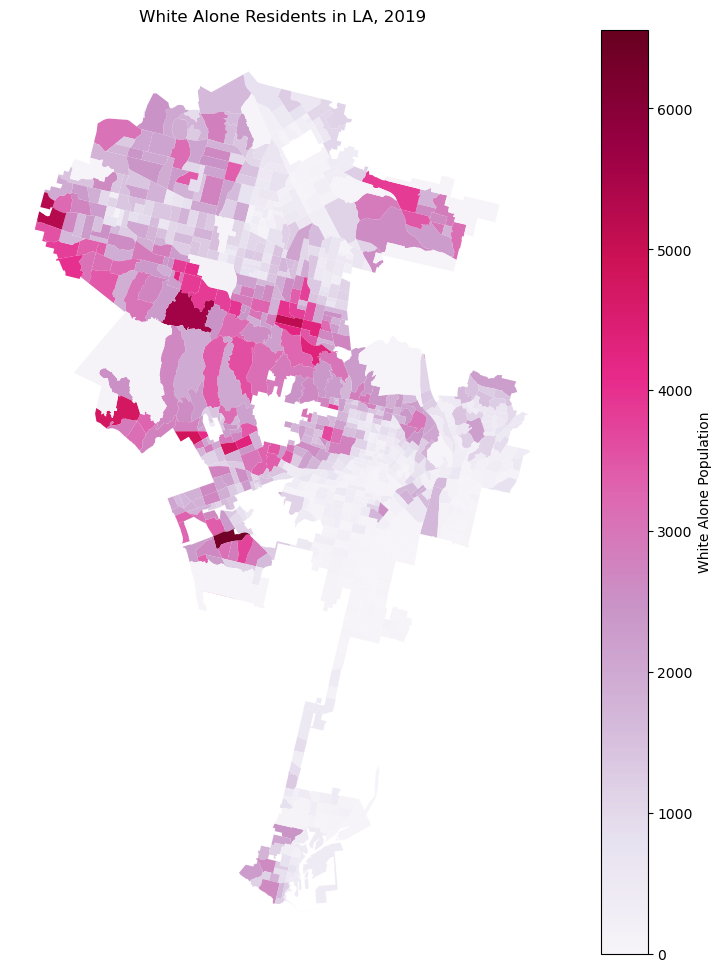

In [39]:
# making maps using matplotlib , #White Alone Residents in the City of LA 

fig,ax = plt.subplots(figsize=(12,12))

la_race.plot(ax=ax,column='White Alone',legend=True,cmap='PuRd',
             legend_kwds={"label": "White Alone Population", "orientation": "vertical"})

ax.axis('off')
ax.set_title('White Alone Residents in LA, 2019')



In [40]:
la_race.head(2)

GISJOIN STATEFP COUNTYFP TRACTCE        GEOID     NAME  \
0  G0600370101110      06      037  101110  06037101110  1011.10   
1  G0600370101122      06      037  101122  06037101122  1011.22   

               NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  Hispanic or Latino  \
0  Census Tract 1011.10  G5020        S  1142401.0  ...                1188   
1  Census Tract 1011.22  G5020        S  2644045.0  ...                 147   

  % Not Hispanic or Latino % White Alone  % Black or African American Alone  \
0                    72.26         61.08                               0.44   
1                    95.68         84.64                               2.17   

   % American Indian and Alaska Native Alone  % Asian Alone  \
0                                       0.07           7.73   
1                                       0.44           6.46   

  % Native Hawaiian and Other Pacific Islander Alone % Some Other Race Alone  \
0                                               0.07                    0.19   
1                                               0.00                    0.00   

  % Two or More Races % Hispanic or Latino  
0                2.69                27.74  
1                1.97                 4.32  

[2 rows x 40 columns]

# Examining SCAG High Injury Network

In [41]:
HIN =gpd.read_file('data4/High_Injury_Network_SCAG.geojson')

In [42]:
HIN.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5964 entries, 0 to 5963
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   OBJECTID              5964 non-null   int32   
 1   SEGMENT_ID            5964 non-null   object  
 2   SEGMENT_NAME          5964 non-null   object  
 3   CITY                  5964 non-null   object  
 4   COUNTY                5964 non-null   object  
 5   MILE                  5964 non-null   float64 
 6   FATALITY_VICTIM       5964 non-null   float64 
 7   SEVERE_INJURY_VICTIM  5964 non-null   float64 
 8   VICTIM_COUNT          5964 non-null   float64 
 9   HIN_AUTO              5964 non-null   object  
 10  HIN_PED               5964 non-null   object  
 11  HIN_BIKE              5964 non-null   object  
 12  HIN_ALL               5964 non-null   object  
 13  TRANSIT_AREA          5964 non-null   object  
 14  EQUITY_AREA           5964 non-null   object  
 

In [43]:
HIN.head(5)

OBJECTID SEGMENT_ID   SEGMENT_NAME           CITY  COUNTY      MILE  \
0         1      10008    E Adams Ave         Orange  Orange  0.499465   
1         2    10140_0  E Balboa Blvd  Newport Beach  Orange  1.002174   
2         3    10140_1  E Balboa Blvd  Newport Beach  Orange  0.543847   
3         4    10145_1      E Ball Rd        Anaheim  Orange  1.098312   
4         5    10145_2      E Ball Rd        Anaheim  Orange  0.755181   

   FATALITY_VICTIM  SEVERE_INJURY_VICTIM  VICTIM_COUNT HIN_AUTO HIN_PED  \
0              0.0                   0.5           0.5       No     Yes   
1              0.0                   2.5           2.5       No     Yes   
2              0.0                   1.0           1.0      Yes      No   
3              0.0                   3.0           3.0      Yes      No   
4              0.0                   1.0           1.0      Yes      No   

  HIN_BIKE HIN_ALL TRANSIT_AREA EQUITY_AREA  YEAR  \
0       No     Yes           No         Yes  2022   
1       No     Yes           No          No  2022   
2       No     Yes           No          No  2022   
3       No     Yes          Yes         Yes  2022   
4       No     Yes          Yes         Yes  2022   

                                            geometry  
0  MULTILINESTRING ((-117.83806 33.80665, -117.83...  
1  MULTILINESTRING ((-117.89062 33.59901, -117.88...  
2  MULTILINESTRING ((-117.90284 33.6031, -117.902...  
3  MULTILINESTRING ((-117.88851 33.8181, -117.888...  
4  MULTILINESTRING ((-117.89739 33.81809, -117.89...

In [44]:
HINla = HIN[HIN.CITY == 'Los Angeles']

In [45]:
HINla.head(2)

OBJECTID SEGMENT_ID SEGMENT_NAME         CITY       COUNTY      MILE  \
1901      1902    10000_2  Branford St  Los Angeles  Los_Angeles  1.001868   
1906      1907      10178    Bridge St  Los Angeles  Los_Angeles  0.440117   

      FATALITY_VICTIM  SEVERE_INJURY_VICTIM  VICTIM_COUNT HIN_AUTO HIN_PED  \
1901              1.0                   3.0           4.0      Yes      No   
1906              0.0                   1.0           1.0      Yes      No   

     HIN_BIKE HIN_ALL TRANSIT_AREA EQUITY_AREA  YEAR  \
1901       No     Yes          Yes         Yes  2022   
1906       No     Yes          Yes         Yes  2022   

                                               geometry  
1901  MULTILINESTRING ((-118.42306 34.23372, -118.42...  
1906  MULTILINESTRING ((-118.21558 34.05145, -118.21...

<Axes: >

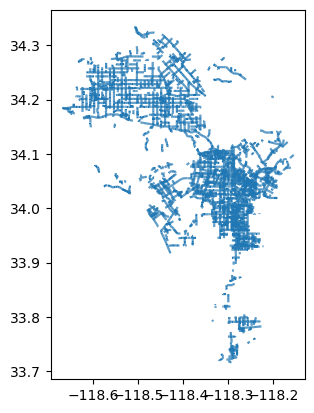

In [46]:
HINla.plot()

In [47]:
# general notes 
#either conduct spatial join or try a different line of code 
# dont think that i need to convert to geodataframe because we are not using points 

In [48]:
# conduct a spatial join 
# error message because there is a mismatch between the projection 

# la_race = ESRI:102003 and HINla = EPSG = 4326

# Next Step is too create a new variable/copy to make sure I create one with the correct projection 

#hmmm i don't think I made a copy 

# first line of code is converting 

la_race = la_race.to_crs('EPSG:4326')
print("Original CRS:" , la_race.crs)

Original CRS: EPSG:4326


In [49]:
# conduct a spatial join 
# error message because there is a mismatch between the projection 

# la_race = ESRI:102003 and HINla = EPSG = 4326

# Here I converted the dataframe. I don't think I made a copy though 

la_race = la_race.to_crs('EPSG:4326')
la_race.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
#conducting a spatial join, however, it is not necessary for overlaying the map 
# helpful for conducitng another layer of analysis 
la_race_HIN =gpd.sjoin(la_race,HINla)
la_race_HIN

GISJOIN STATEFP COUNTYFP TRACTCE        GEOID     NAME  \
0     G0600370101110      06      037  101110  06037101110  1011.10   
0     G0600370101110      06      037  101110  06037101110  1011.10   
1     G0600370101122      06      037  101122  06037101122  1011.22   
2     G0600370101210      06      037  101210  06037101210  1012.10   
2     G0600370101210      06      037  101210  06037101210  1012.10   
...              ...     ...      ...     ...          ...      ...   
1166  G0600370980031      06      037  980031  06037980031  9800.31   
1166  G0600370980031      06      037  980031  06037980031  9800.31   
1166  G0600370980031      06      037  980031  06037980031  9800.31   
1166  G0600370980031      06      037  980031  06037980031  9800.31   
1167  G0600370980033      06      037  980033  06037980033  9800.33   

                  NAMELSAD  MTFCC FUNCSTAT       ALAND  ...  FATALITY_VICTIM  \
0     Census Tract 1011.10  G5020        S   1142401.0  ...              3.0   
0     Census Tract 1011.10  G5020        S   1142401.0  ...              1.0   
1     Census Tract 1011.22  G5020        S   2644045.0  ...              0.0   
2     Census Tract 1012.10  G5020        S    650690.0  ...              0.0   
2     Census Tract 1012.10  G5020        S    650690.0  ...              3.0   
...                    ...    ...      ...         ...  ...              ...   
1166  Census Tract 9800.31  G5020        S  12641938.0  ...              0.5   
1166  Census Tract 9800.31  G5020        S  12641938.0  ...              0.0   
1166  Census Tract 9800.31  G5020        S  12641938.0  ...              0.0   
1166  Census Tract 9800.31  G5020        S  12641938.0  ...              0.0   
1167  Census Tract 9800.33  G5020        S  12666626.0  ...              0.0   

     SEVERE_INJURY_VICTIM VICTIM_COUNT  HIN_AUTO  HIN_PED  HIN_BIKE HIN_ALL  \
0                     6.0          9.0       Yes      Yes       Yes     Yes   
0                     0.0          1.0       Yes       No        No     Yes   
1                     0.5          0.5       Yes       No        No     Yes   
2                     4.5          4.5       Yes      Yes        No     Yes   
2                     6.0          9.0       Yes      Yes       Yes     Yes   
...                   ...          ...       ...      ...       ...     ...   
1166                  0.5          1.0       Yes       No        No     Yes   
1166                  1.0          1.0       Yes       No        No     Yes   
1166                  2.0          2.0        No      Yes       Yes     Yes   
1166                  4.0          4.0        No      Yes       Yes     Yes   
1167                  1.0          1.0       Yes       No        No     Yes   

     TRANSIT_AREA EQUITY_AREA  YEAR  
0              No         Yes  2022  
0              No         Yes  2022  
1              No         Yes  2022  
2              No         Yes  2022  
2              No         Yes  2022  
...           ...         ...   ...  
1166           No         Yes  2022  
1166           No         Yes  2022  
1166           No         Yes  2022  
1166           No         Yes  2022  
1167           No         Yes  2022  

[4436 rows x 57 columns]

In [51]:
la_race_HIN.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4436 entries, 0 to 1167
Data columns (total 57 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   GISJOIN                                             4436 non-null   object  
 1   STATEFP                                             4436 non-null   object  
 2   COUNTYFP                                            4436 non-null   object  
 3   TRACTCE                                             4436 non-null   object  
 4   GEOID                                               4436 non-null   object  
 5   NAME                                                4436 non-null   object  
 6   NAMELSAD                                            4436 non-null   object  
 7   MTFCC                                               4436 non-null   object  
 8   FUNCSTAT                                            4436 non-null

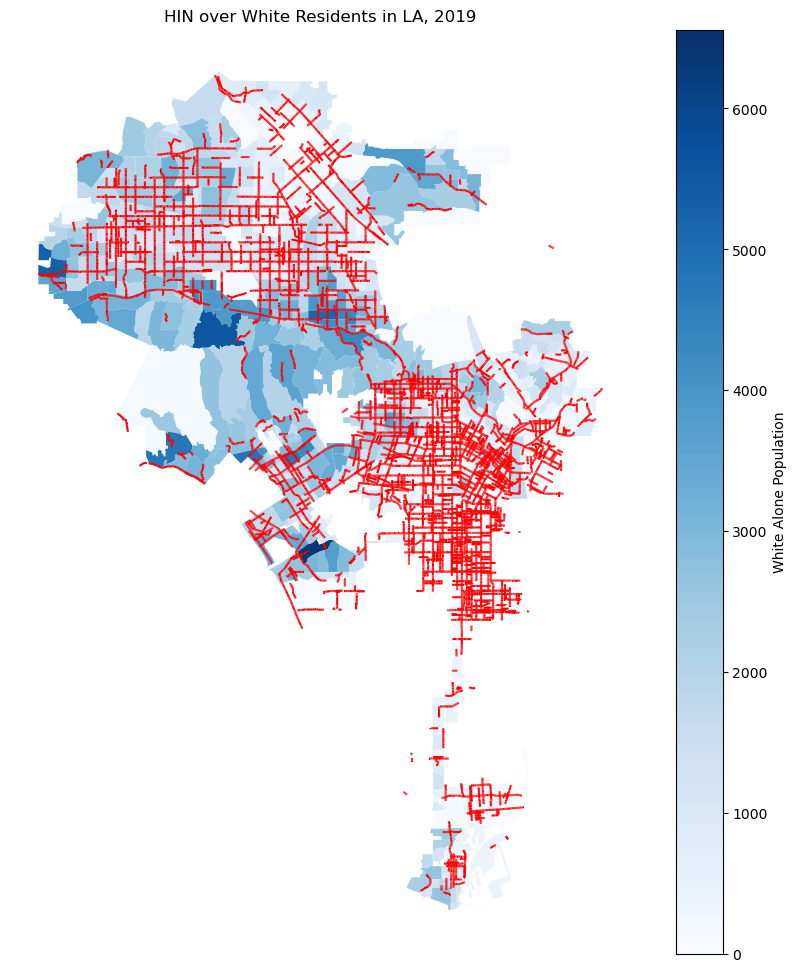

In [52]:
#trying to overlap a map - White Alone 
fig,ax = plt.subplots(figsize=(12,12))

la_race.plot(ax=ax,column='White Alone',legend=True,cmap='Blues',
             legend_kwds={"label": "White Alone Population", "orientation": "vertical"})

#Overlay HIN on the City of LA 
HINla.plot(ax=ax, color='red', markersize=.5)

ax.axis('off')
ax.set_title('HIN over White Residents in LA, 2019')

plt.savefig('data4/HIN_White.jpg')

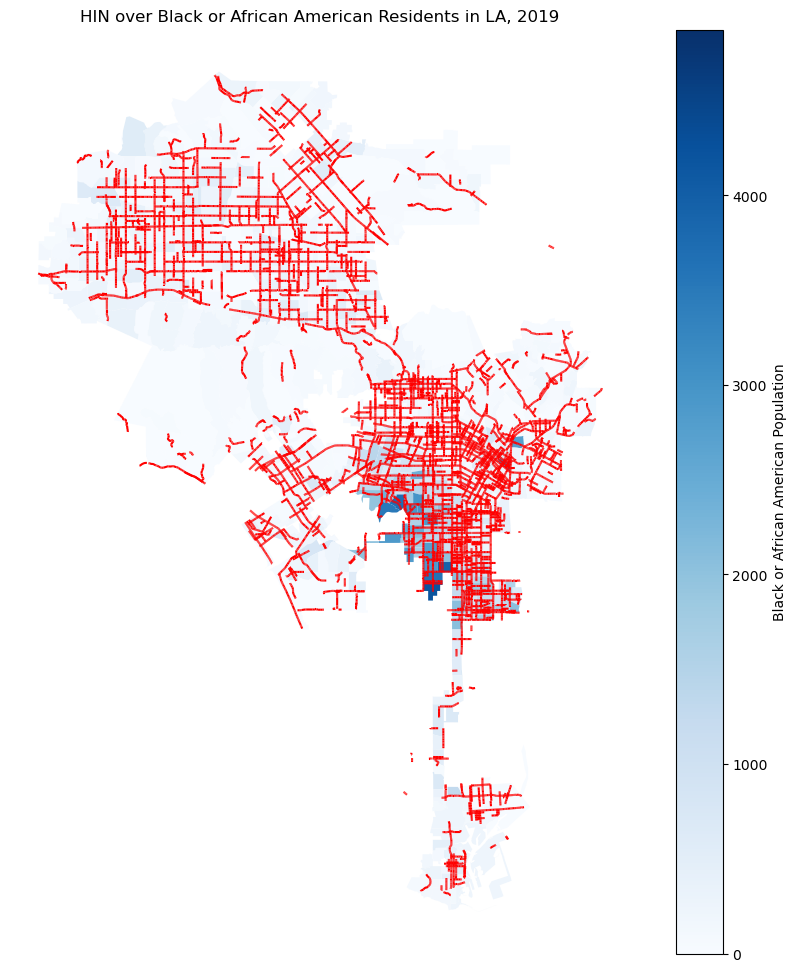

In [53]:
#trying to overlap a map - Black or African American Alone 
fig,ax = plt.subplots(figsize=(12,12))

la_race.plot(ax=ax,column='Black or African American Alone',legend=True,cmap='Blues',
             legend_kwds={"label": "Black or African American Population", "orientation": "vertical"})

#Overlay HIN on the City of LA 
HINla.plot(ax=ax, color='red', markersize=.5)

ax.axis('off')
ax.set_title('HIN over Black or African American Residents in LA, 2019')

plt.savefig('data4/HIN_Black.jpg')

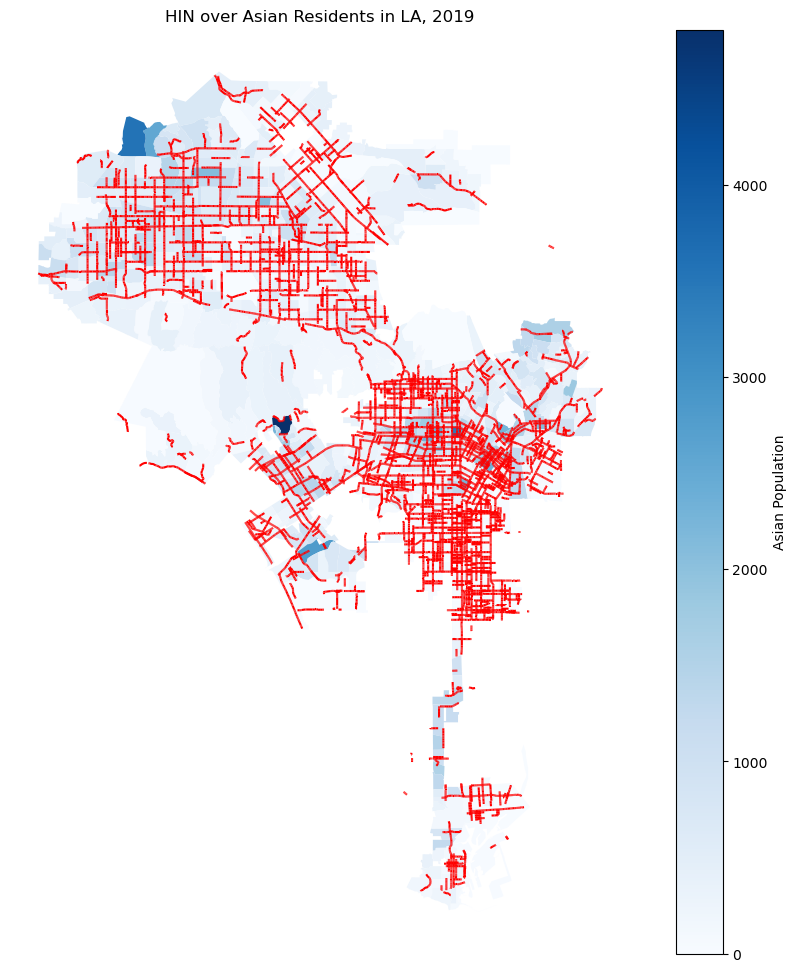

In [54]:
#trying to overlap a map - Asian Alone 
fig,ax = plt.subplots(figsize=(12,12))

la_race.plot(ax=ax,column='Asian Alone',legend=True,cmap='Blues',
             legend_kwds={"label": "Asian Population", "orientation": "vertical"})

#Overlay HIN on the City of LA 
HINla.plot(ax=ax, color='red', markersize=.5)

ax.axis('off')
ax.set_title('HIN over Asian Residents in LA, 2019')

plt.savefig('data4/HIN_Asian.jpg')

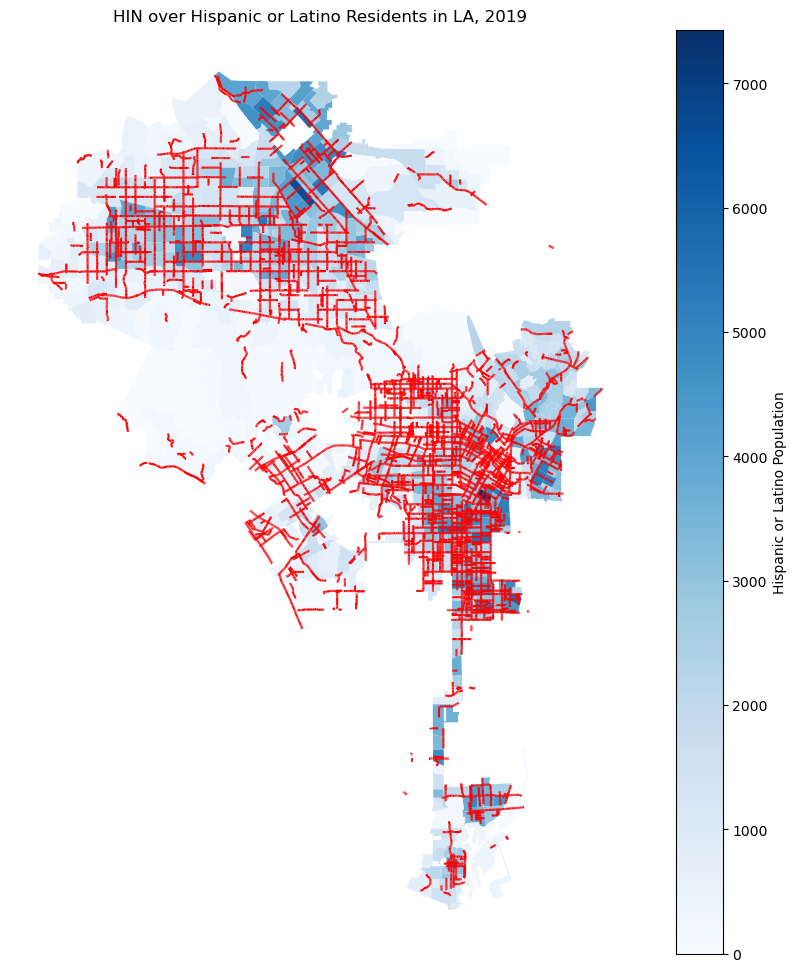

In [55]:
#trying to overlap a map - Hispanic or Latino 
fig,ax = plt.subplots(figsize=(12,12))

la_race.plot(ax=ax,column='Hispanic or Latino',legend=True,cmap='Blues',
             legend_kwds={"label": "Hispanic or Latino Population", "orientation": "vertical"})

#Overlay HIN on the City of LA 
HINla.plot(ax=ax, color='red', markersize=.001)

ax.axis('off')
ax.set_title('HIN over Hispanic or Latino Residents in LA, 2019')

plt.savefig('data4/HIN_Hispanic.jpg')

In [56]:
# save file - plt.savefig('data4/name.jpg')

# Next Steps  
Play with color scheme  
Consider the next level of analysis